# **1. Perkenalan Dataset: Extrovert vs Introvert Behavior Data**

Nama: Muhammad Fadli Fauzi Sileuw
Username: fadli_sileuw


1. **Sumber Dataset**:  
Dataset ini berisi data tentang perilaku individu dalam kehidupan sosial sehari-hari, bertujuan untuk mengklasifikasikan apakah seseorang termasuk extrovert atau introvert berdasarkan aktivitas dan preferensi sosialnya.
Dataset ini diambil dari kaggle dan dapat anda unduh [disini](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data?select=personality_datasert.csv)

# **2. Import Library**

Tahap ini mengimpor pustaka yang diperlukan untuk eksplorasi dan preprocessing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
# Ukuran dataset
print("Ukuran dataset:", df.shape)

Ukuran dataset: (2900, 8)


> Insight:  
> Dataset terdiri dari 2900 baris dan 8 kolom.  
> Kolom target adalah `Personality`, sedangkan sisanya adalah fitur masukan.

# **4. Exploratory Data Analysis (EDA)**

EDA bertujuan untuk memahami struktur, pola, dan karakteristik dari data.  
EDA dibagi menjadi dua bagian utama:
1. **Univariate Analysis** – melihat distribusi tiap fitur secara individual
2. **Multivariate Analysis** – melihat hubungan antar fitur dan dengan target

Kita juga akan meninjau:
- Struktur dataset
- Statistik ringkasan
- Korelasi antar fitur
- Distribusi kelas target

In [6]:
# Informasi kolom dan tipe data
print("\nInformasi kolom:")
df.info()


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


**Insight:**  
Semua kolom tidak memiliki nilai kosong (`non-null = 2900`).  
Ada 5 kolom bertipe numerik (`float64`) dan 3 kolom kategorikal (`object`).  


In [7]:
# Statistik deskriptif fitur numerik
print("\nStatistik deskriptif:")
display(df.describe())


Statistik deskriptif:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


**Insight:**  
Nilai mean dan standar deviasi menunjukkan skala fitur numerik yang bervariasi.  
Beberapa fitur seperti `Post_frequency` dan `Time_spent_Alone` tampak memiliki nilai minimum dan maksimum yang cukup berbeda, indikasi potensi **outlier** atau **distribusi skewed**.


In [8]:
# Cek missing value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


**Insight:**  
Tidak ada nilai kosong di seluruh kolom, artinya tidak perlu imputasi data atau penghapusan baris.


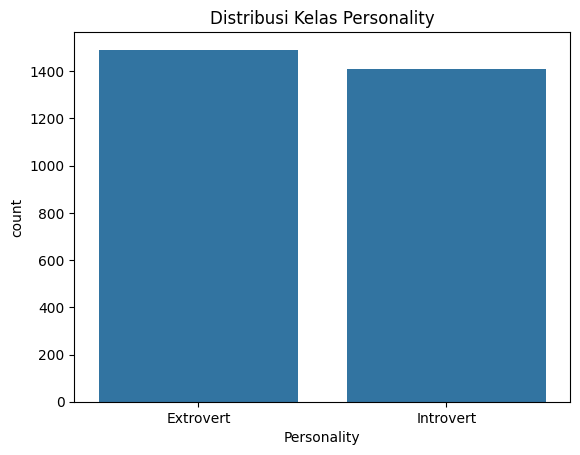

In [9]:
# Distribusi kelas target (Personality)
sns.countplot(data=df, x='Personality')
plt.title("Distribusi Kelas Personality")
plt.show()

**Insight:**  
Kelas `Extrovert` dan `Introvert` memiliki distribusi yang cukup seimbang.


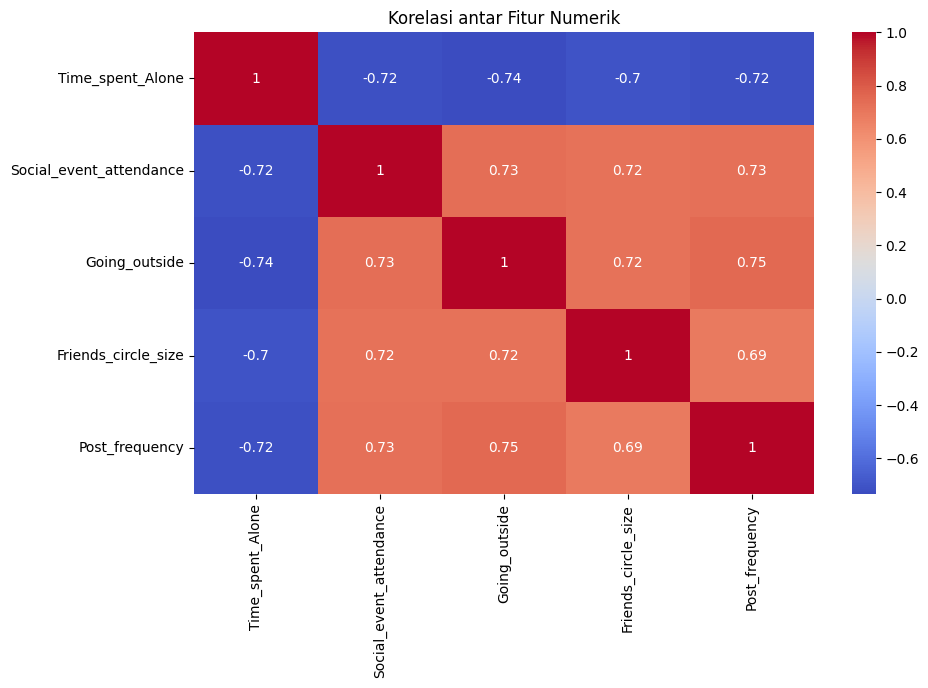

In [13]:
df_num = df.select_dtypes(include=['float64', 'int64'])

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()


**Insight:**

- Sebagian besar fitur numerik menunjukkan korelasi yang cukup kuat satu sama lain
  

### Univariate Analysis

Univariate analysis digunakan untuk memahami distribusi dari masing-masing fitur secara individual.

#### Distribusi Fitur Numerik

Fitur numerik: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


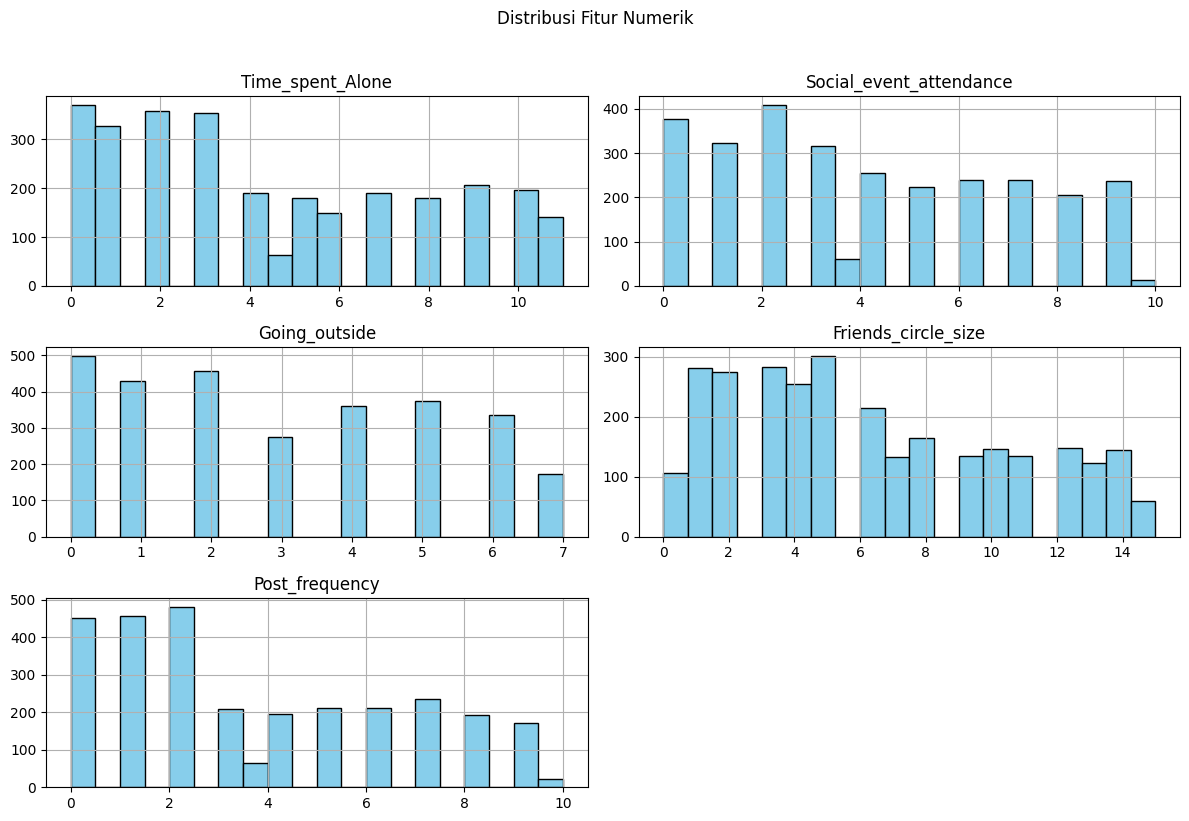

In [15]:
# Menampilkan semua kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Fitur numerik:", list(num_cols))

# Histogram untuk distribusi numerik
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", y=1.02)
plt.tight_layout()
plt.show()

**Insight:**

- **Time_spent_Alone**: Terdistribusi cukup merata
- **Social_event_attendance**: Pola distribusi tidak normal yang mana terlihat **right-skewed**.
- **Going_outside**: memiliki nilai rendah yang menunjukkan **right-skew**.
- **Friends_circle_size**: menunjukkan **sedikit skew ke kanan**.
- **Post_frequency**: Distribusi terlihat mirip dengan **right-skewed**.


#### Distribusi Fitur Kategorik

Fitur kategorik: ['Stage_fear', 'Drained_after_socializing', 'Personality']


<ipython-input-16-1520822798>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


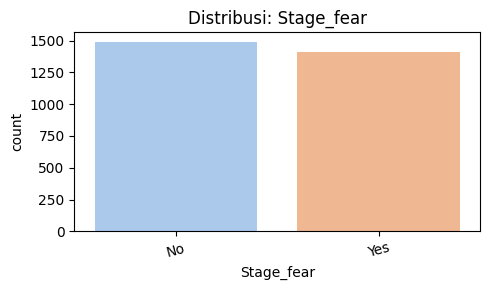

<ipython-input-16-1520822798>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


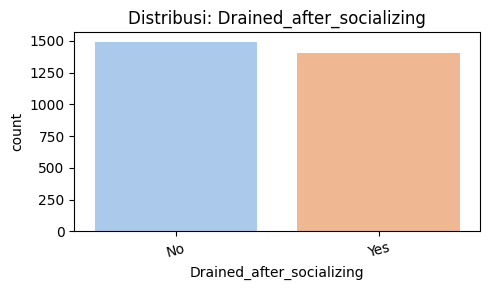

<ipython-input-16-1520822798>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


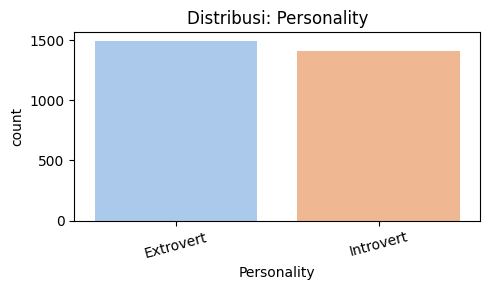

In [16]:
# Menampilkan semua kolom kategorik (termasuk target)
cat_cols = df.select_dtypes(include='object').columns
print("Fitur kategorik:", list(cat_cols))

# Plot bar untuk masing-masing kolom kategorik
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribusi: {col}')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


**Insight:**

secara keseluruhan, hasil visualisasinya menunjukan bahwa nilai nya balance antara extrovert dan introvert

### Multivariate Analysis

Analisis ini bertujuan untuk memahami hubungan antar fitur dan target (`Personality`).

#### Boxplot Fitur Numerik vs Personality

<ipython-input-20-3326697138>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set2', ax=axes[i])
<ipython-input-20-3326697138>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set2', ax=axes[i])
<ipython-input-20-3326697138>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set2', ax=axes[i])
<ipython-input-20-3326697138>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

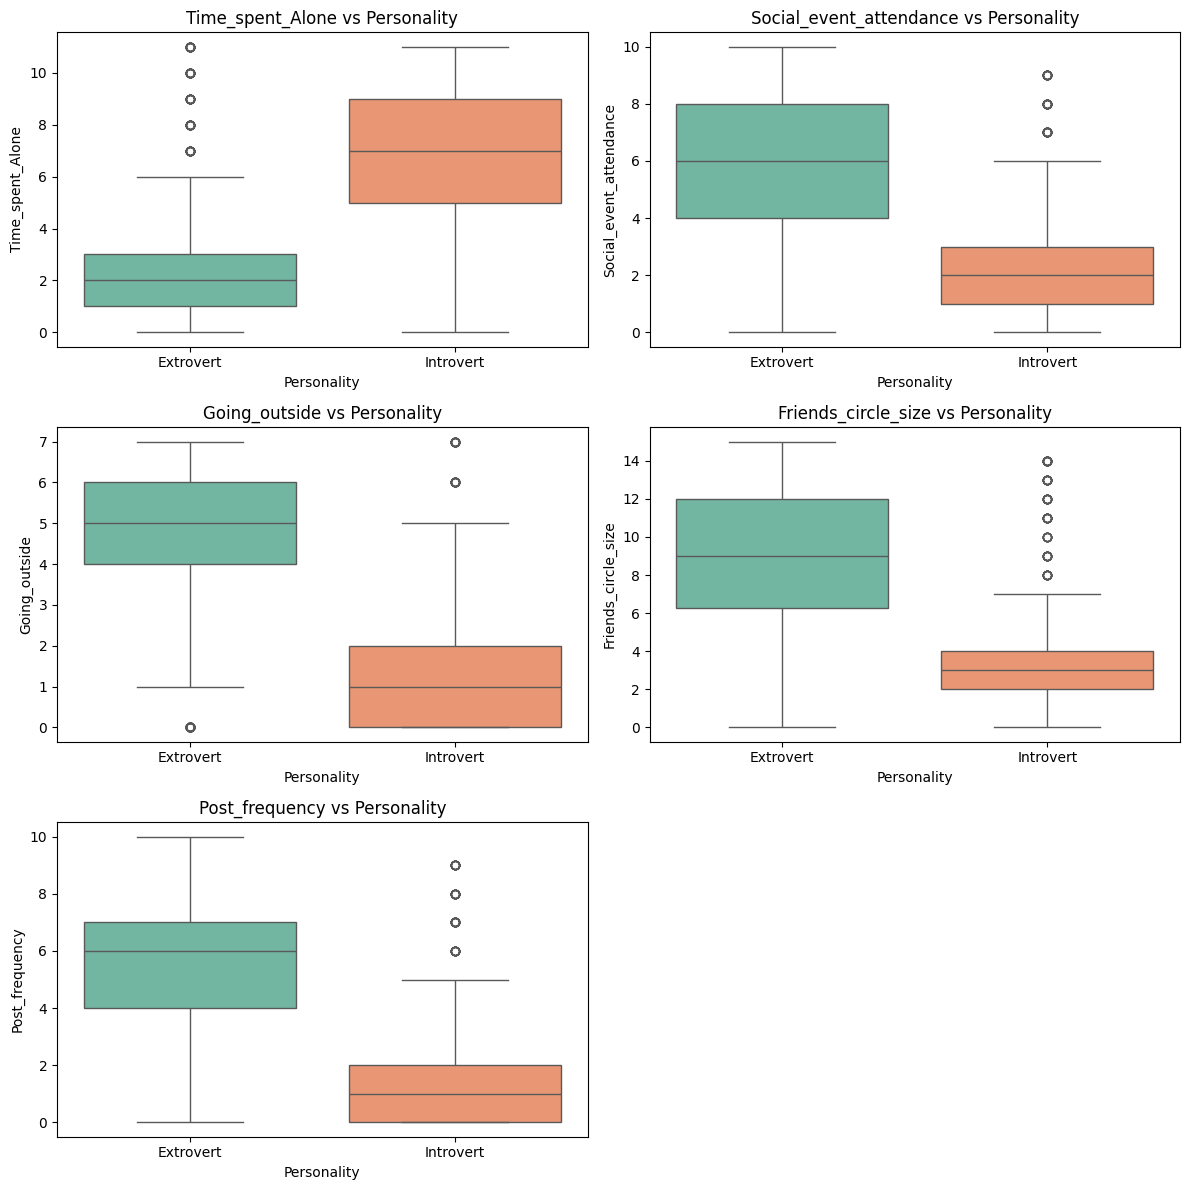

In [20]:
df['Personality'] = df['Personality'].astype('category')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat grid plot: 2 kolom, jumlah baris tergantung jumlah fitur
n_cols = 2
n_rows = -(-len(num_cols) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Plot setiap boxplot dalam subplot
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Personality', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Personality')
    axes[i].tick_params(axis='x', rotation=0)

# Kosongkan subplot sisa jika jumlah fitur ganjil
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Insight: Distribusi Fitur Numerik**

1. **Time_spent_Alone**:
   - Nilai Median jauh lebih tinggi pada *Introvert*.
   - Distribusi untuk *Introvert* juga lebih lebar.
   - Outlier lebih muncul di sisi *Extrovert* yang artinya ada minoritas extrovert yang juga sering menyendiri.

2. **Social_event_attendance**:
   - *Extrovert* memiliki nilai median yang jauh lebih tinggi.
   - Penyebaran nilai untuk *Extrovert* lebih besar.

3. **Going_outside**:
   - Pola serupa: *Extrovert* secara konsisten menunjukkan kecenderungan lebih sering keluar rumah.
   - Penyebaran *Introvert* relatif rendah.

4. **Friends_circle_size**:
   - Nilai Friends_circle_size jauh lebih besar untuk *Extrovert*.
   - *Introvert* memiliki nilai median dan sebaran nilai yang sempit.
   - Banyak outlier muncul di sisi *Introvert*.

5. **Post_frequency**:
   - Post_frequency (sosial media) lebih tinggi untuk *Extrovert*.
   - *Introvert* memiliki sebaran yang lebih rendah.



#### Countplot Fitur Kategorikal vs Personality

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2900 non-null   float64 
 1   Stage_fear                 2900 non-null   object  
 2   Social_event_attendance    2900 non-null   float64 
 3   Going_outside              2900 non-null   float64 
 4   Drained_after_socializing  2900 non-null   object  
 5   Friends_circle_size        2900 non-null   float64 
 6   Post_frequency             2900 non-null   float64 
 7   Personality                2900 non-null   category
dtypes: category(1), float64(5), object(2)
memory usage: 161.7+ KB


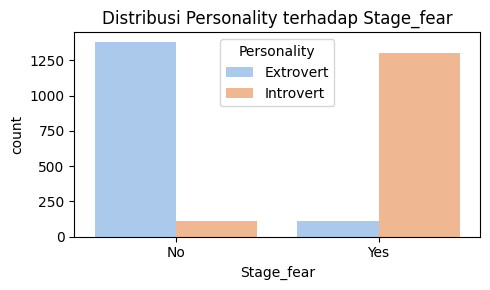

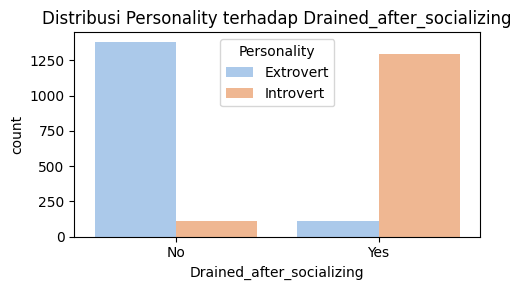

In [22]:
# Visualisasi hubungan fitur kategorikal terhadap Personality
cat_cols = ['Stage_fear', 'Drained_after_socializing']

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col, hue='Personality', palette='pastel')
    plt.title(f'Distribusi Personality terhadap {col}')
    plt.tight_layout()
    plt.show()

**Insight:**

1. **Stage_fear**:
   - Mayoritas **Extrovert** menjawab "No" yang mendukung karakteristik sosial mereka.
   - Sebaliknya, **Introvert** sangat dominan menjawab "Yes" yang mencerminkan kecenderungan untuk menghindari perhatian sosial.

2. **Drained_after_socializing**:
   - Sebagian besar **Introvert** merasa kelelahan setelah sosialisasi.
   - Sementara itu, **Extrovert** justru cenderung tidak merasa lelah.


# **5. Data Preprocessing**


Tahapan ini bertujuan untuk membersihkan dan mengubah data ke format yang siap digunakan dalam pemodelan machine learning.

Langkah-langkah yang dilakukan:
1. **Encoding Label**: Mengubah `Personality`, `Stage_fear`, dan `Drained_after_socializing` dari teks menjadi angka.
2. **Normalisasi**: Menstandarisasi fitur numerik agar berada pada skala yang sebanding.
3. **Simpan hasil preprocessing** dalam format `.csv` sebagai dataset final.

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [29]:
# Salin dataset agar tidak merusak aslinya
df_clean = df.copy()

# 1. Label Encoding untuk fitur kategorikal biner (Yes/No)
binary_encoder = LabelEncoder()
df_clean['Stage_fear'] = binary_encoder.fit_transform(df_clean['Stage_fear'])  # Yes=1, No=0
df_clean['Drained_after_socializing'] = binary_encoder.fit_transform(df_clean['Drained_after_socializing'])


In [30]:
# 2. Encoding target label (Extrovert=0, Introvert=1)
df_clean['Personality'] = binary_encoder.fit_transform(df_clean['Personality'])


In [31]:
# 3. Normalisasi fitur numerik
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.drop('Personality')
scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

In [32]:
# Tampilkan 5 baris pertama
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.147014,-0.972784,0.012759,1.350613,-0.970772,1.590680,0.496104,0
1,1.306226,1.027977,-1.379944,-1.350613,1.030108,-1.481437,-0.195199,1
2,1.306226,1.027977,-1.031768,-0.450204,1.030108,-0.299853,-0.540850,1
3,-1.309607,-0.972784,0.709111,1.800817,-0.970772,1.826996,1.533059,0
4,-0.437663,-0.972784,1.753638,0.450204,-0.970772,0.409096,0.496104,0


In [33]:
# Simpan hasil preprocessing ke CSV
df_clean.to_csv('personality_dataset_preprocessing.csv', index=False)

**Insight:**

- Nilai `Personality` dikodekan sebagai: Extrovert = 0, Introvert = 1.
- Fitur numerik telah dinormalisasi dengan distribusi rata-rata 0 dan deviasi standar 1.
